       GENOMIC SEX          AGE  Education_Level  SMOKING_STATUS TOBACCO_TYPE  \
count         1120  1107.000000      1120.000000     1120.000000          375   
unique           2          NaN              NaN             NaN           10   
top              M          NaN              NaN             NaN       Vaping   
freq           578          NaN              NaN             NaN          143   
mean           NaN    59.752484         2.110714        0.513393          NaN   
std            NaN    12.025372         1.520274        0.779427          NaN   
min            NaN    20.000000         1.000000        0.000000          NaN   
25%            NaN    56.000000         1.000000        0.000000          NaN   
50%            NaN    61.000000         1.000000        0.000000          NaN   
75%            NaN    67.000000         3.000000        1.000000          NaN   
max            NaN   152.000000         7.000000        2.000000          NaN   

        YELLOW_SKIN      AN

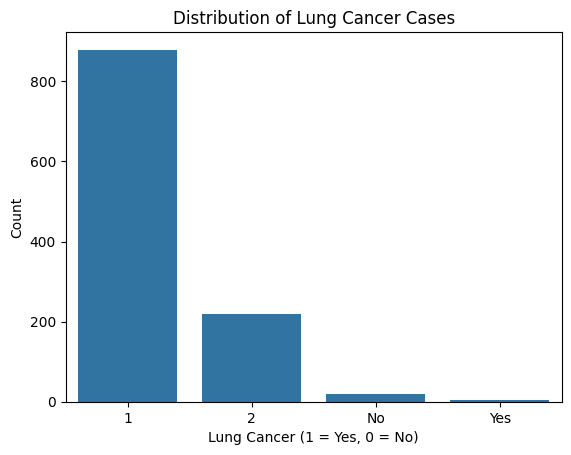

In [78]:
# Task 2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Referral_Deferral_Lung_Cancer_Data.csv')

# Corrected list of retained variables based on actual column names
retained_columns = [
    'GENOMIC SEX', 'AGE', 'Education_Level', 'SMOKING_STATUS', 
    'TOBACCO_TYPE', 'YELLOW_SKIN', 'ANXIETY', 'PEER_PRESSURE', 
    'COPD_DIAGNOSES', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 
    'ALCOHOL_CONSUMPTION', 'WEEKLY_GLASSES_OF_ALCOHOL', 
    'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 
    'CHEST_PAIN', 'LUNG_CANCER'
]

# Filter DataFrame to include only retained columns
df_retained = df[retained_columns]

# Basic statistical description of retained variables
description = df_retained.describe(include='all')
print(description)

# Measurement scale type (categorical or continuous)
scale_type = df_retained.dtypes
print(scale_type)

# Plotting the distribution of the target variable
sns.countplot(x='LUNG_CANCER', data=df_retained)
plt.title('Distribution of Lung Cancer Cases')
plt.xlabel('Lung Cancer (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()


In [79]:
# Task 3(b)
import pandas as pd
import numpy as np

# Load the dataset


# 1. Impute missing values for Age with the median
df_retained['AGE'] = df_retained['AGE'].fillna(df_retained['AGE'].median())

# 2. Remove outliers in Age (e.g., values outside a plausible range, like 0-120)
df_retained = df_retained[(df_retained['AGE'] > 0) & (df_retained['AGE'] <= 120)]

# 3. Combine categories in Education Level with few instances
# Replace example categories with the appropriate numeric or text labels from your data
df_retained['Education_Level'] = df_retained['Education_Level'].replace([6, 7], 5)  # Adjust as necessary

# 4. One-hot encoding for categorical variables like Education Level, Smoking Status, Tobacco Type
df_retained = pd.get_dummies(df_retained, columns=['Education_Level', 'SMOKING_STATUS', 'TOBACCO_TYPE'])

# 5. Ensure the column is numeric, then cap the maximum value for Weekly Glasses of Alcohol to a reasonable limit (e.g., 30)
df_retained['WEEKLY_GLASSES_OF_ALCOHOL'] = pd.to_numeric(df_retained['WEEKLY_GLASSES_OF_ALCOHOL'], errors='coerce')
df_retained['WEEKLY_GLASSES_OF_ALCOHOL'] = np.where(df_retained['WEEKLY_GLASSES_OF_ALCOHOL'] > 30, 30, df_retained['WEEKLY_GLASSES_OF_ALCOHOL'])

# 6. Impute missing values for COPD Diagnosis with mode
df_retained['COPD_DIAGNOSES'] = df_retained['COPD_DIAGNOSES'].fillna(df_retained['COPD_DIAGNOSES'].mode()[0])

# 7. Binary indicator for missing Wheezing values, then impute with mode
df_retained['Wheezing_missing'] = df_retained['WHEEZING'].isnull().astype(int)
df_retained['WHEEZING'] = df_retained['WHEEZING'].fillna(df_retained['WHEEZING'].mode()[0])

# 8. Handle possible errors in Yellow Skin by creating a binary indicator
df_retained['Yellow_Skin_missing'] = df_retained['YELLOW_SKIN'].isnull().astype(int)
df_retained['YELLOW_SKIN'] = df_retained['YELLOW_SKIN'].fillna(df_retained['YELLOW_SKIN'].mode()[0])

# After transformations, check for any remaining missing values
print(df_retained.isnull().sum())

# Preview the cleaned dataset
print(df_retained.head())


GENOMIC SEX                                0
AGE                                        0
YELLOW_SKIN                                0
ANXIETY                                    0
PEER_PRESSURE                              0
COPD_DIAGNOSES                             0
FATIGUE                                    5
ALLERGY                                    0
WHEEZING                                   0
ALCOHOL_CONSUMPTION                        0
WEEKLY_GLASSES_OF_ALCOHOL                502
COUGHING                                   0
SHORTNESS_OF_BREATH                        4
SWALLOWING_DIFFICULTY                      0
CHEST_PAIN                                 0
LUNG_CANCER                                0
Education_Level_1                          0
Education_Level_2                          0
Education_Level_3                          0
Education_Level_4                          0
Education_Level_5                          0
SMOKING_STATUS_0                           0
SMOKING_ST

C:\Users\DeLL\AppData\Local\Temp\ipykernel_12892\2354469937.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retained['AGE'] = df_retained['AGE'].fillna(df_retained['AGE'].median())


In [82]:
df_retained = df_retained.applymap(lambda x: 1 if x is True else (0 if x is False else x))

# Convert remaining object columns to numeric, forcing errors to NaN
df_retained = df_retained.apply(pd.to_numeric, errors='coerce')

# Check for any remaining NaN values after conversion
print(df_retained.isna().sum())

# Optionally fill NaNs with a value, such as median, or drop rows/columns
df_retained = df_retained.fillna(df_retained.median())

# Print the first few rows to verify conversion
print(df_retained.head())

GENOMIC SEX                                0
AGE                                        0
YELLOW_SKIN                                0
ANXIETY                                    0
PEER_PRESSURE                              0
COPD_DIAGNOSES                             0
FATIGUE                                    5
ALLERGY                                    0
WHEEZING                                   0
ALCOHOL_CONSUMPTION                        0
WEEKLY_GLASSES_OF_ALCOHOL                502
COUGHING                                   0
SHORTNESS_OF_BREATH                        5
SWALLOWING_DIFFICULTY                      0
CHEST_PAIN                                 0
LUNG_CANCER                               23
Education_Level_1                          0
Education_Level_2                          0
Education_Level_3                          0
Education_Level_4                          0
Education_Level_5                          0
SMOKING_STATUS_0                           0
SMOKING_ST

C:\Users\DeLL\AppData\Local\Temp\ipykernel_12892\825089097.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_retained = df_retained.applymap(lambda x: 1 if x is True else (0 if x is False else x))


# Task 4(b) – Build Predictive Classification Models

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Split data into features (X) and target (y)
X = df_retained.drop('LUNG_CANCER', axis=1)
y = df_retained['LUNG_CANCER']
# 80:20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Build and train models
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Print feature names and data shapes
print("Feature names used for evaluation:", X.columns.tolist())
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Feature names used for evaluation: ['GENOMIC SEX', 'AGE', 'YELLOW_SKIN', 'ANXIETY', 'PEER_PRESSURE', 'COPD_DIAGNOSES', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL_CONSUMPTION', 'WEEKLY_GLASSES_OF_ALCOHOL', 'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'Education_Level_1', 'Education_Level_2', 'Education_Level_3', 'Education_Level_4', 'Education_Level_5', 'SMOKING_STATUS_0', 'SMOKING_STATUS_1', 'SMOKING_STATUS_2', 'TOBACCO_TYPE_Cigarettes', 'TOBACCO_TYPE_Cigars', 'TOBACCO_TYPE_Dissolvable Tobacco', 'TOBACCO_TYPE_E- cigarette', 'TOBACCO_TYPE_Hookah', 'TOBACCO_TYPE_Kreteks', 'TOBACCO_TYPE_Pipe', 'TOBACCO_TYPE_Smokeless Tobacco (Chew)', 'TOBACCO_TYPE_VAPING', 'TOBACCO_TYPE_Vaping', 'Wheezing_missing', 'Yellow_Skin_missing']
Training data shape: (895, 35)
Testing data shape: (224, 35)


# Task 5(a) – Confusion Matrix for Each Trained Model

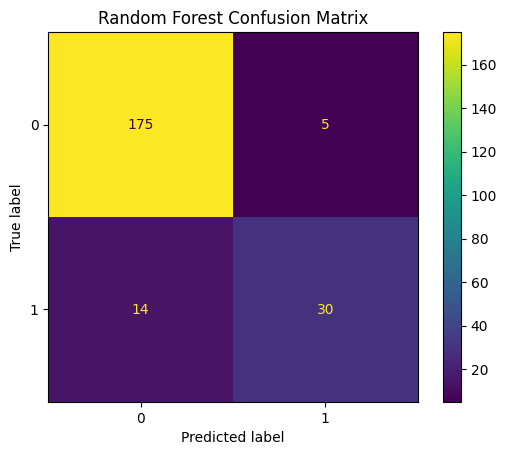

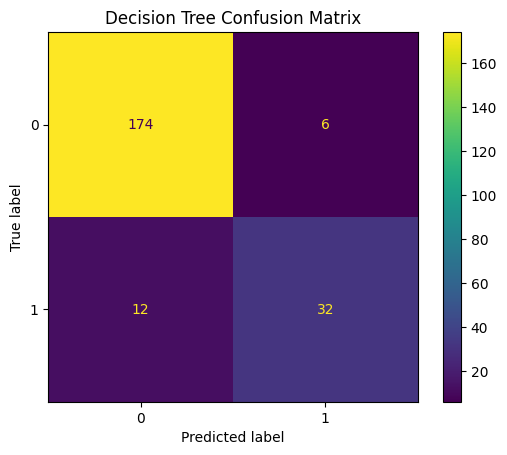

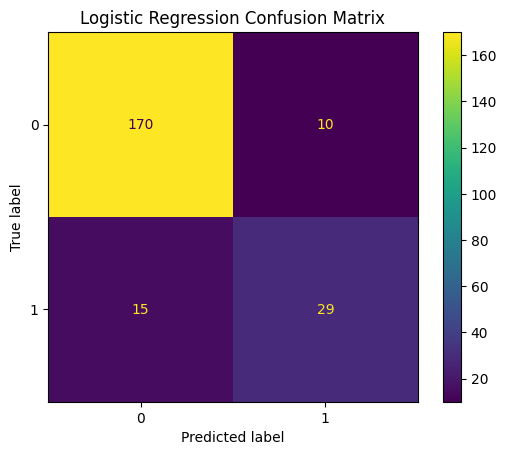

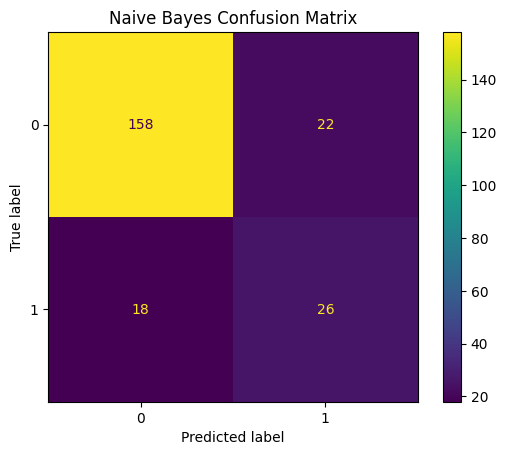

In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Random Forest Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_model.predict(X_test))
ConfusionMatrixDisplay(rf_cm).plot()
plt.title("Random Forest Confusion Matrix")
plt.show()

# Decision Tree Confusion Matrix
dt_cm = confusion_matrix(y_test, dt_model.predict(X_test))
ConfusionMatrixDisplay(dt_cm).plot()
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Logistic Regression Confusion Matrix
lr_cm = confusion_matrix(y_test, lr_model.predict(X_test))
ConfusionMatrixDisplay(lr_cm).plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Naive Bayes Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_model.predict(X_test))
ConfusionMatrixDisplay(nb_cm).plot()
plt.title("Naive Bayes Confusion Matrix")
plt.show()



In [91]:
# Task 5(b) – Evaluation Metrics Selection and Model Scores
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# Initialize a dictionary to hold the scores for each model
model_scores = {}

# Random Forest
model_scores['RF'] = {
    'Accuracy': accuracy_score(y_test, rf_model.predict(X_test)),
    'Recall': recall_score(y_test, rf_model.predict(X_test)),
    'Precision': precision_score(y_test, rf_model.predict(X_test)),
    'F-Score': f1_score(y_test, rf_model.predict(X_test)),
    'AUC-ROC': roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
}

# Decision Tree
model_scores['DT'] = {
    'Accuracy': accuracy_score(y_test, dt_model.predict(X_test)),
    'Recall': recall_score(y_test, dt_model.predict(X_test)),
    'Precision': precision_score(y_test, dt_model.predict(X_test)),
    'F-Score': f1_score(y_test, dt_model.predict(X_test)),
    'AUC-ROC': roc_auc_score(y_test, dt_model.predict_proba(X_test)[:,1])
}

# Logistic Regression
model_scores['LR'] = {
    'Accuracy': accuracy_score(y_test, lr_model.predict(X_test)),
    'Recall': recall_score(y_test, lr_model.predict(X_test)),
    'Precision': precision_score(y_test, lr_model.predict(X_test)),
    'F-Score': f1_score(y_test, lr_model.predict(X_test)),
    'AUC-ROC': roc_auc_score(y_test, lr_model.predict_proba(X_test)[:,1])
}

# Naive Bayes
model_scores['NB'] = {
    'Accuracy': accuracy_score(y_test, nb_model.predict(X_test)),
    'Recall': recall_score(y_test, nb_model.predict(X_test)),
    'Precision': precision_score(y_test, nb_model.predict(X_test)),
    'F-Score': f1_score(y_test, nb_model.predict(X_test)),
    'AUC-ROC': roc_auc_score(y_test, nb_model.predict_proba(X_test)[:,1])
}

# Print the scores for all models
for model_name, scores in model_scores.items():
    print(f"Scores for {model_name}:")
    for metric, score in scores.items():
        print(f"{metric}: {score}")
    print("\n")


Scores for RF:
Accuracy: 0.9151785714285714
Recall: 0.9722222222222222
Precision: 0.9259259259259259
F-Score: 0.948509485094851
AUC-ROC: 0.9341540404040405


Scores for DT:
Accuracy: 0.9196428571428571
Recall: 0.9666666666666667
Precision: 0.9354838709677419
F-Score: 0.9508196721311475
AUC-ROC: 0.8469696969696969


Scores for LR:
Accuracy: 0.8883928571428571
Recall: 0.9444444444444444
Precision: 0.918918918918919
F-Score: 0.9315068493150684
AUC-ROC: 0.9333333333333332


Scores for NB:
Accuracy: 0.8214285714285714
Recall: 0.8777777777777778
Precision: 0.8977272727272727
F-Score: 0.8876404494382022
AUC-ROC: 0.8719065656565657




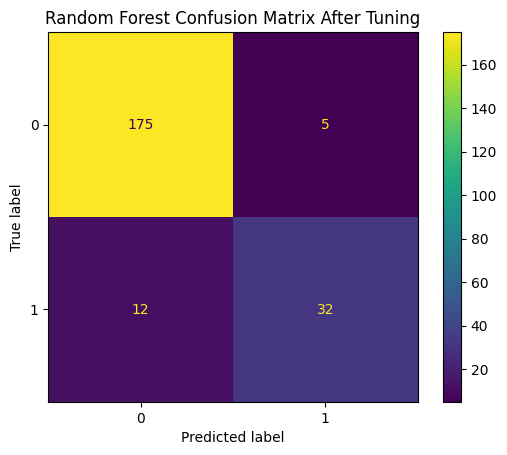

New Recall: 0.9722222222222222
New AUC-ROC: 0.9449494949494949


In [92]:
# Task 5(d) – Hyperparameter Tuning with GridSearchCV

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, roc_auc_score

# Confusion matrix after tuning
best_rf_cm = confusion_matrix(y_test, best_rf_model.predict(X_test))
ConfusionMatrixDisplay(best_rf_cm).plot()
plt.title("Random Forest Confusion Matrix After Tuning")
plt.show()

# New Scores
new_recall = recall_score(y_test, best_rf_model.predict(X_test))
new_auc_roc = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])

print(f"New Recall: {new_recall}")
print(f"New AUC-ROC: {new_auc_roc}")
